In [4]:
# install yfinance module
# !pip install yfinance

In [42]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt

In [2]:
# create custom function: make_graph()
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2022-08-13']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2022-08-13']
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

### Use yfinance to Extract Apple Stock Data

In [55]:
apple = yf.Ticker("AAPL")

In [4]:
apple_data = apple.history(period="max")

In [5]:
apple_data.reset_index(inplace=True)
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


### Use Webscraping to Extract Apple Revenue Data

In [6]:
url = "https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue"
html_data = requests.get(url).text

In [7]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Apple Revenue 2010-2022 | AAPL | MacroTrends</title>]

In [17]:
apple_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    apple_revenue = apple_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [18]:
apple_revenue.dropna(inplace=True)
apple_revenue = apple_revenue[apple_revenue['Revenue'] != ""]

In [47]:
apple_revenue.head()

,Date,Revenue
0,2022-06-30,82959.0
1,2022-03-31,97278.0
2,2021-12-31,123945.0
3,2021-09-30,83360.0
4,2021-06-30,81434.0


In [48]:
apple_revenue.tail()

,Date,Revenue
49,2010-03-31,13499.0
50,2009-12-31,15683.0
51,2009-09-30,12207.0
52,2009-06-30,9734.0
53,2009-03-31,9084.0


### Plot apple stock 

Text(0.5, 1.0, 'Historical Apple Price')

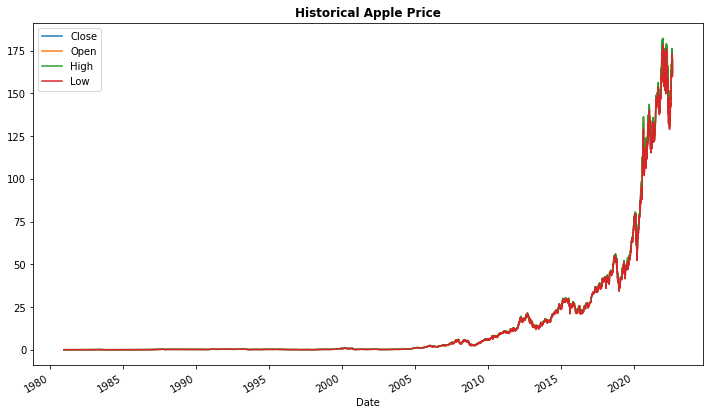

In [43]:
plt.rcParams["figure.figsize"] = (12, 7)
apple_data.plot(x="Date", y=["Close", "Open", "High", "Low"])
plt.title("Historical Apple Price", fontweight='bold')

Text(0.5, 1.0, 'Historical Apple Revenue')

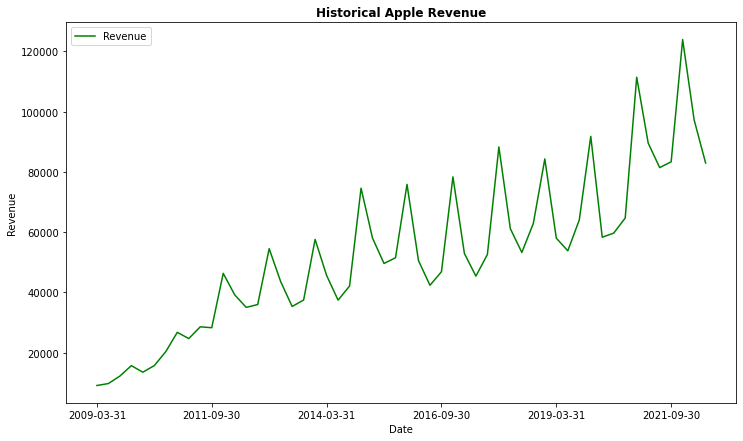

In [52]:
plt.rcParams["figure.figsize"] = (12, 7)
apple_revenue['Revenue'] = apple_revenue['Revenue'].astype(float)
apple_revenue = apple_revenue.sort_values(by='Date', ascending=True)
apple_revenue.plot(x='Date', y='Revenue', color='green')
plt.ylabel('Revenue')
plt.title('Historical Apple Revenue', fontweight='bold')

In [ ]:
# Export Data to csv file

In [53]:
# Apple historical price data
from pathlib import Path  
filepath = Path('/Users/ellypham/Downloads/apple_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
apple_data.to_csv(filepath)  

In [54]:
# Apple historical revenue data
from pathlib import Path  
filepath = Path('/Users/ellypham/Downloads/apple_revenue.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
apple_revenue.to_csv(filepath)  